In [9]:
from util.preprocessing import refine, initialize_tokenizer, vectorize
from util.embeddings import load_glove, load_word2vec_pretrained
from sklearn.datasets import fetch_20newsgroups
from util.NLP import NLPModel
from util.constants import TEST_SIZE, GLOVE, WORD2VEC, MODEL_TYPE_CNN, MODEL_TYPE_LSTM, MODEL_TYPE_CNN_LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from util.graphs import plotModelComparison, plotEmbeddingComparison, average_accuracy_for_all_models,  average_accuracy_for_all_embeddings
import numpy as np

In [10]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers'))
texts = newsgroups.data
labels = newsgroups.target

In [11]:
refined_texts = refine(texts)
tokenizer = initialize_tokenizer(refined_texts)
preprocessed_texts = vectorize(tokenizer, refined_texts)

In [12]:
glove_embedding_index = load_glove()

Found 400000 word vectors.


In [13]:
word2vec_pretrained_embedding_index = load_word2vec_pretrained()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_texts, labels, test_size=TEST_SIZE, shuffle=True)

In [15]:
glove_CNN = NLPModel(word_embedding=GLOVE,
                     model_type=MODEL_TYPE_CNN,
                     tokenizer=tokenizer, 
                     embeddings=glove_embedding_index)

glove_LSTM = NLPModel(word_embedding=GLOVE,
                     model_type=MODEL_TYPE_LSTM,
                     tokenizer=tokenizer,
                     embeddings=glove_embedding_index)

glove_CNN_LSTM = NLPModel(word_embedding=GLOVE,
                          model_type=MODEL_TYPE_CNN_LSTM,
                          tokenizer=tokenizer,
                          embeddings=glove_embedding_index)

word2vec_CNN = NLPModel(word_embedding=WORD2VEC,
                        model_type=MODEL_TYPE_CNN,
                        tokenizer=tokenizer,
                        embeddings=word2vec_pretrained_embedding_index)


word2vec_LSTM = NLPModel(word_embedding=WORD2VEC,
                         model_type=MODEL_TYPE_LSTM,
                         tokenizer=tokenizer,
                         embeddings=word2vec_pretrained_embedding_index)

word2vec_CNN_LSTM = NLPModel(word_embedding=WORD2VEC,
                             model_type=MODEL_TYPE_CNN_LSTM,
                             tokenizer=tokenizer,
                             embeddings=word2vec_pretrained_embedding_index)


In [16]:
glove_CNN.train(x_train, y_train)
glove_LSTM.train(x_train, y_train)
glove_CNN_LSTM.train(x_train, y_train)
word2vec_CNN.train(x_train, y_train)
word2vec_LSTM.train(x_train, y_train)
word2vec_CNN_LSTM.train(x_train, y_train)

Epoch 1/30
106/106 [==============================] - 26s 231ms/step - loss: 2.7454 - accuracy: 0.1273 - val_loss: 2.1518 - val_accuracy: 0.2931
Epoch 2/30
106/106 [==============================] - 24s 229ms/step - loss: 2.0063 - accuracy: 0.3118 - val_loss: 1.5607 - val_accuracy: 0.4715
Epoch 3/30
106/106 [==============================] - 24s 229ms/step - loss: 1.5506 - accuracy: 0.4667 - val_loss: 1.2249 - val_accuracy: 0.5935
Epoch 4/30
106/106 [==============================] - 24s 230ms/step - loss: 1.3020 - accuracy: 0.5694 - val_loss: 1.0654 - val_accuracy: 0.6545
Epoch 5/30
106/106 [==============================] - 24s 229ms/step - loss: 1.1565 - accuracy: 0.6229 - val_loss: 0.9696 - val_accuracy: 0.6950
Epoch 6/30
106/106 [==============================] - 24s 228ms/step - loss: 1.0403 - accuracy: 0.6598 - val_loss: 0.9311 - val_accuracy: 0.6976
Epoch 7/30
106/106 [==============================] - 24s 229ms/step - loss: 0.9444 - accuracy: 0.6924 - val_loss: 0.8493 - val_ac

In [17]:
models = [glove_CNN, glove_LSTM, glove_CNN_LSTM, word2vec_CNN, word2vec_LSTM, word2vec_CNN_LSTM]

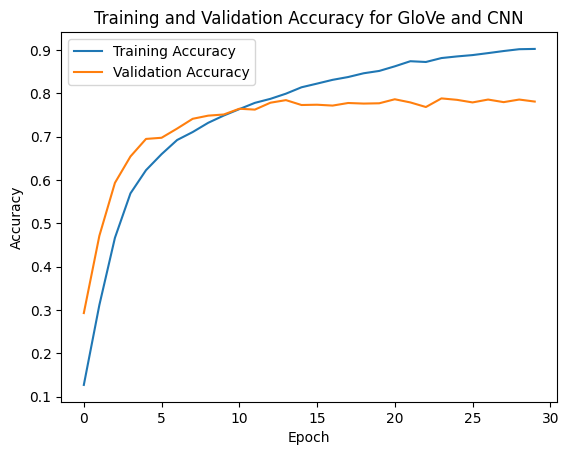

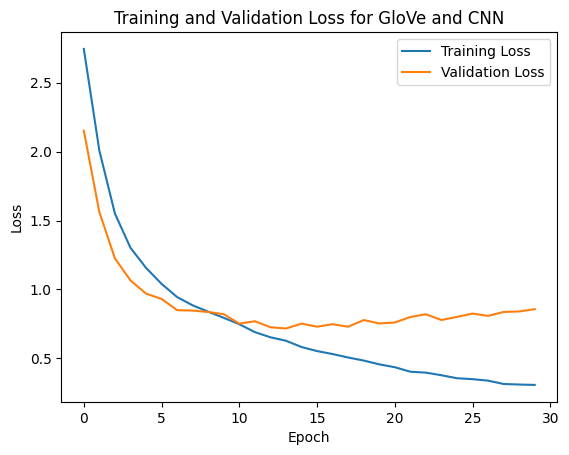

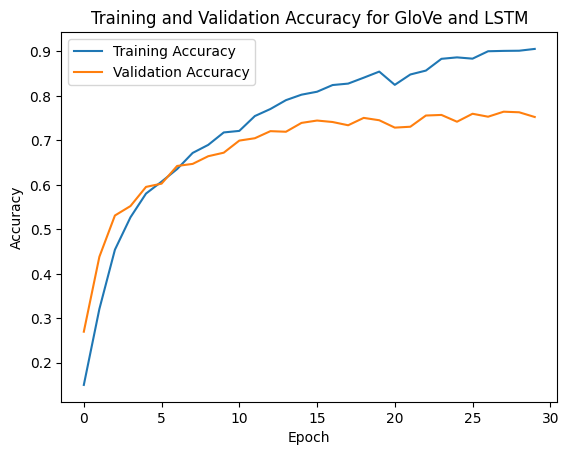

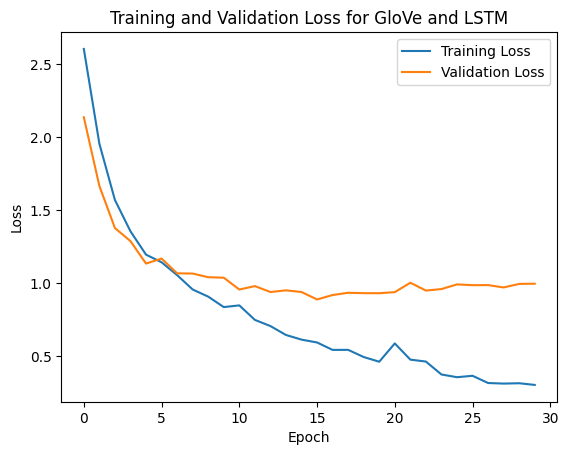

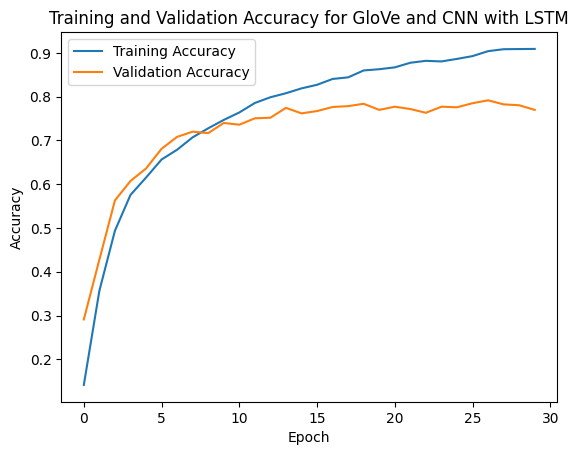

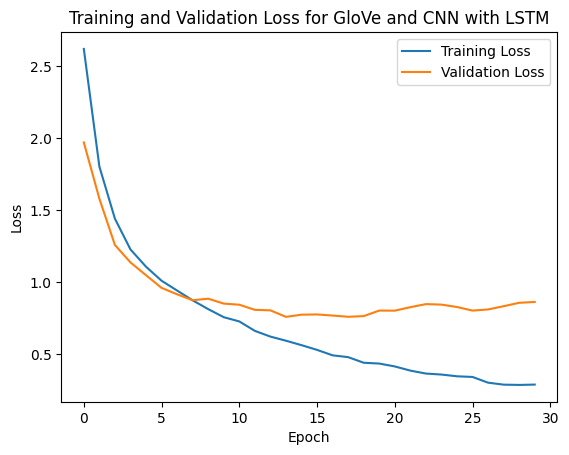

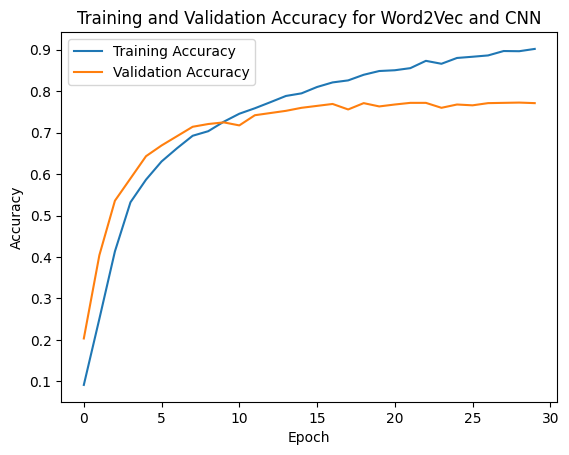

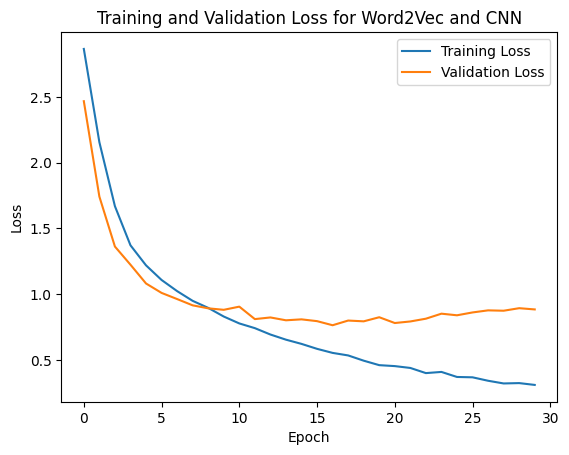

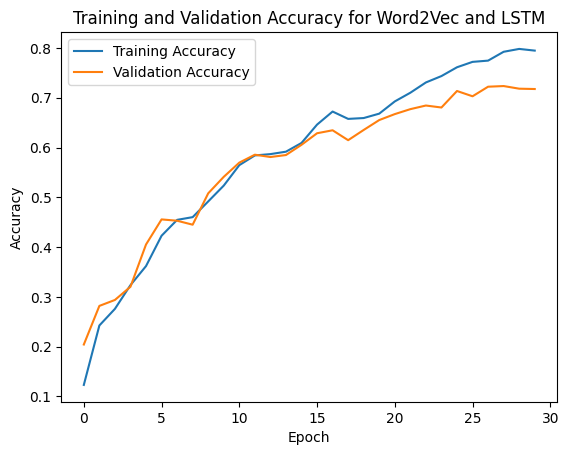

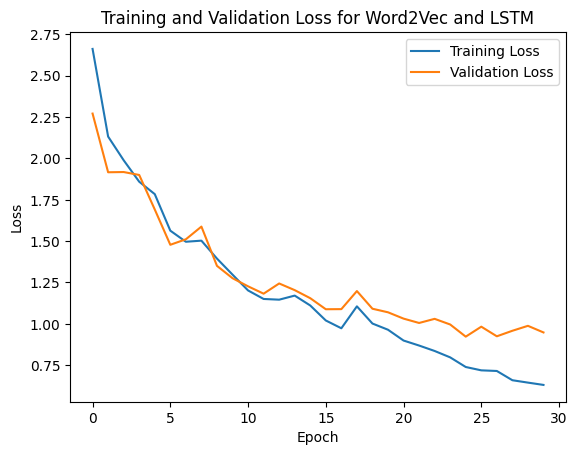

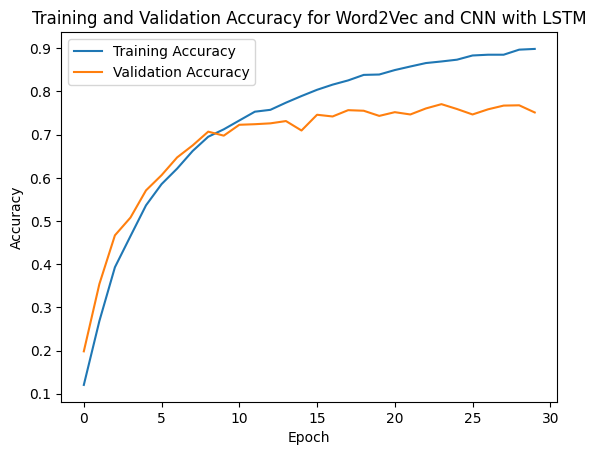

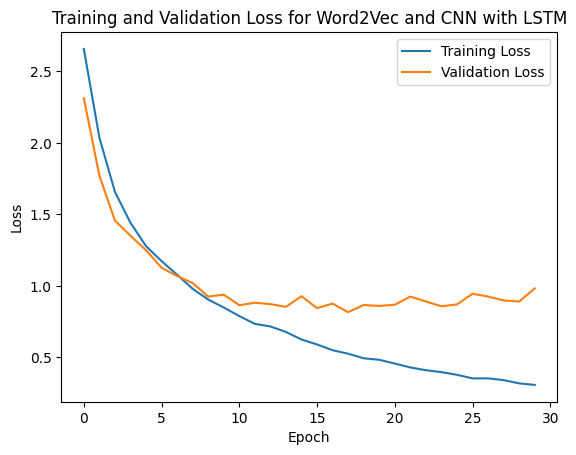

In [18]:
# Accuracy and loss plots for all combinations
for model in models:
    model.plot_accuracy()
    model.plot_loss()

In [19]:
glove_cnn_acc = glove_CNN.model_history.history['val_accuracy']
glove_lstm_acc = glove_LSTM.model_history.history['val_accuracy']
glove_combo_acc = glove_CNN_LSTM.model_history.history['val_accuracy']
word2vec_cnn_acc = word2vec_CNN.model_history.history['val_accuracy']
word2vec_lstm_acc = word2vec_LSTM.model_history.history['val_accuracy']
word2vec_combo_acc = word2vec_CNN_LSTM.model_history.history['val_accuracy']

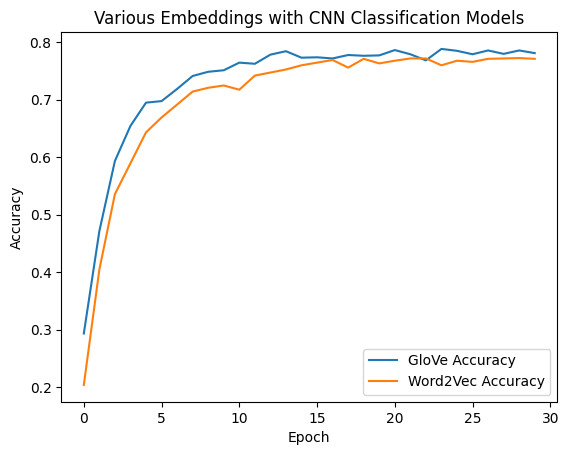

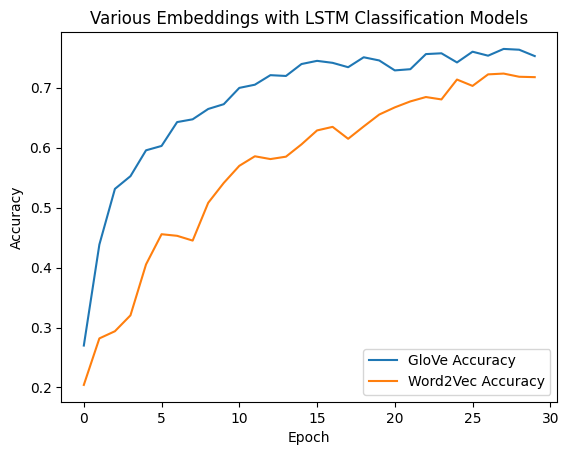

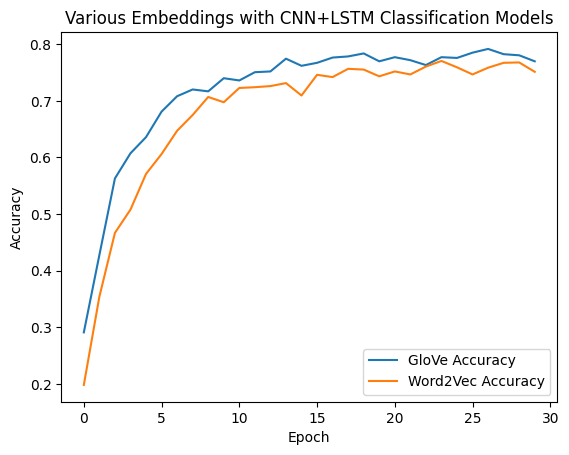

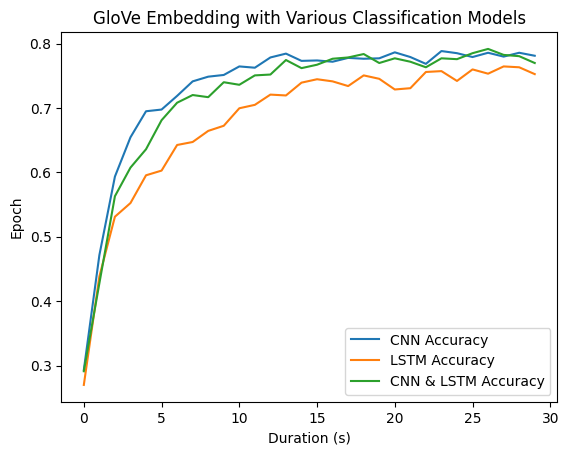

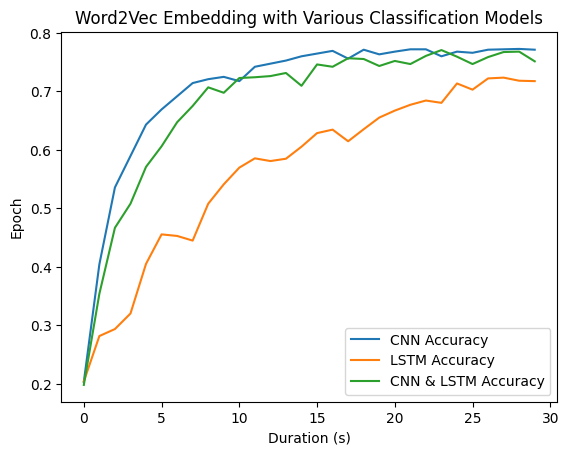

In [20]:
plotEmbeddingComparison("CNN", glove_cnn_acc, word2vec_cnn_acc)
plotEmbeddingComparison("LSTM", glove_lstm_acc, word2vec_lstm_acc)
plotEmbeddingComparison("CNN+LSTM", glove_combo_acc, word2vec_combo_acc)

plotModelComparison("GloVe", glove_cnn_acc, glove_lstm_acc, glove_combo_acc)
plotModelComparison("Word2Vec", word2vec_cnn_acc, word2vec_lstm_acc, word2vec_combo_acc)

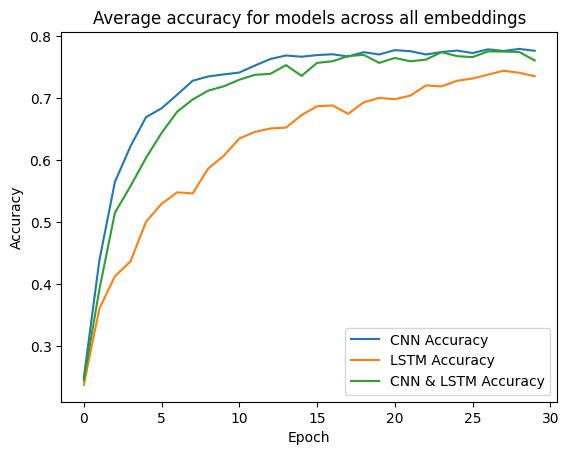

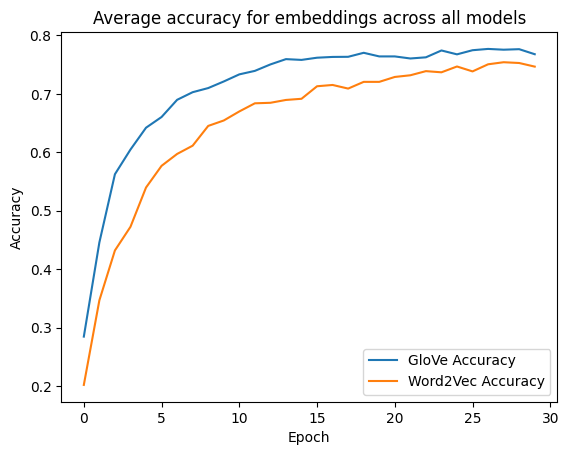

In [21]:
average_accuracy_for_all_embeddings(glove_cnn_acc, glove_lstm_acc, glove_combo_acc, word2vec_cnn_acc, word2vec_lstm_acc, word2vec_combo_acc)
average_accuracy_for_all_models(glove_cnn_acc, glove_lstm_acc, glove_combo_acc, word2vec_cnn_acc, word2vec_lstm_acc, word2vec_combo_acc)

In [25]:
print("GloVe CNN:")
glove_CNN.evaluate(x_test=x_test, y_test=y_test)
print("GloVe LSTM:")
glove_LSTM.evaluate(x_test=x_test, y_test=y_test)
print("GloVe CNN with LSTM:")
glove_CNN_LSTM.evaluate(x_test=x_test, y_test=y_test)

print("Word2Vec CNN:")
word2vec_CNN.evaluate(x_test=x_test, y_test=y_test)
print("Word2Vec LSTM:")
word2vec_LSTM.evaluate(x_test=x_test, y_test=y_test)
print("Word2Vec CNN with LSTM:")
word2vec_CNN_LSTM.evaluate(x_test=x_test, y_test=y_test)

GloVe CNN:
118/118 [==============================] - 2s 19ms/step
Model accuracy is: 0.7907161803713528
GloVe LSTM:
118/118 [==============================] - 4s 33ms/step
Model accuracy is: 0.7753315649867374
GloVe CNN with LSTM:
118/118 [==============================] - 2s 20ms/step
Model accuracy is: 0.7912466843501327
Word2Vec CNN:
118/118 [==============================] - 2s 19ms/step
Model accuracy is: 0.7848806366047746
Word2Vec LSTM:
118/118 [==============================] - 4s 32ms/step
Model accuracy is: 0.7411140583554376
Word2Vec CNN with LSTM:
118/118 [==============================] - 2s 18ms/step
Model accuracy is: 0.7785145888594165
